<h1 align='center'>Indexing and Querying external KBs through GPT — GPT Index (LlamaIndex)</h1>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

# Contextualizando

<font color="orange">Indexação, consulta e geração de resposta para grandes fontes de Dados.</font>

Qualquer pessoa que esteja lendo isso já experimentou ou pelo menos ouviu falar do `ChatGPT`. Tecnicamente, é apenas um modelo `GPT3`, ajustado para Aprendizagem por Reforço com Feedback Humano (`RLHF - Reinforcement Learning from Human Feedback`), tornando-o, portanto, `conversacional`.

Um dos desafios nos sistemas atuais é personalizar o ChatGPT ou qualquer modelo `GPT` para um `domínio personalizado` que consiste em dados maiores que o tamanho de prompt permitido do GPT (`~ 4000`). Seus aplicativos podem ser — consultar suas informações pessoais (`documentos`, `google drive`, `canais de comunicação como slack`, `discord`), conectar bancos de dados `SQL` existentes para fazer perguntas ou consultar uma página da web específica/Wikipedia.

Nesta postagem, usaremos os modelos `GPT3 da OpenAI` ([Models — OpenAI API](https://platform.openai.com/docs/models/gpt-3)) e a `biblioteca GPT Index` ou agora chamada de [LlamaIndex](https://gpt-index.readthedocs.io/en/latest/index.html) para conectar a todos os tipos de informações externas. Observe que, para configurar a biblioteca, você precisará de sua própria OpenAI key, que será usada para fazer chamadas `GPT`.



# Personalizando modelos de linguagem para um domínio específico

Como os `modelos GPT` foram treinados em todos os `“dados da web”`, há duas questões que se tornam importantes —

<font color="red">1.</font> Como podemos personalizá-lo para um determinado domínio?

<font color="red">2.</font> Como o tamanho do token dos modelos GPT atuais é fixo, precisamos fornecer a ele o `prompt relevante` (de nosso database pessoal) para que ele responda à query.

# Indexando todas as fontes de dados

A `indexação` em ciência da computação pode ser simplesmente definida como uma lista de dados, grupos de arquivos ou entradas de banco de dados. As várias fontes de dados que temos (documentos do Google drive, slack, Twitter, apresentações locais) `precisam ser indexadas antes` que possamos recuperar o contexto mais relevante para responder à pergunta feita pelo usuário.

```
A biblioteca GPT_index (agora LlamaIndex) consiste em um conjunto de estruturas de dados para facilitar o uso de bases de conhecimento externas com `LLMs`.
```

Ele basicamente fornece a seguinte funcionalidade:

<font color="red">1.</font> Interfaces Python para buscar dados pessoais de todas as fontes a seguir. Aqui estão alguns dos recursos dos quais você pode buscar dados. A lista também inclui `SQL Databases`.

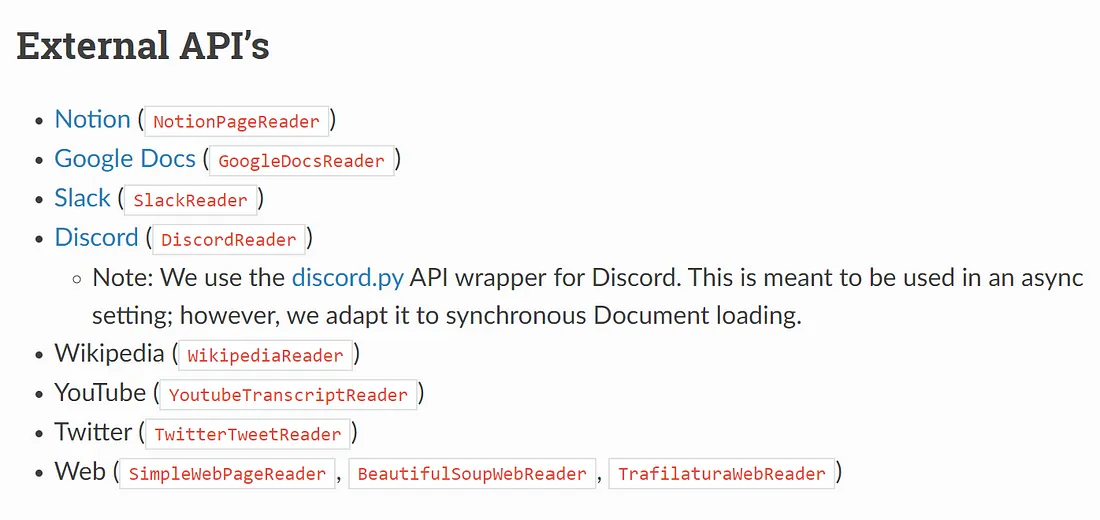

<font color="red">2.</font> Diferentes tipos de indexadores para indexar todos os dados buscados.


<font color="red">3.</font> Módulo de síntese de resposta para responder à consulta — isso envolve buscar o contexto mais significativo para fornecer no `prompt GPT`.

# Vários índices

## Baseado em lista (básico)

Armazena nós (`nodes`) como uma cadeia sequencial. `Durante a consulta`, ele leva a saída todos ou `top k` similares aos nós de consulta para o módulo de síntese de resposta. Da mesma forma, `Vetores` ou `Embeddings` de texto também podem ser salvos junto com o texto usando a classe `GPTSimpleVectorIndex`.

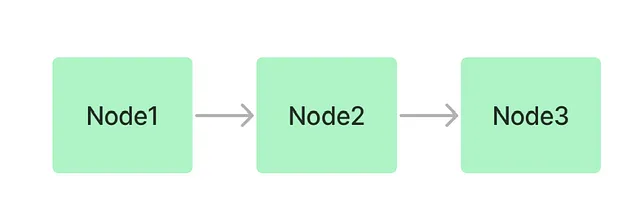

```
index = GPTListIndex(documents)
```

## Baseado em árvore

O índice de árvore constrói uma árvore hierárquica a partir de um conjunto de nós (`Nodes`).

`Trabalhando` — Internamente a árvore é formada por prompts de resumo. Ele recebe uma `lista de documentos de texto` como entrada. Em seguida, ele cria um índice de árvore de baixo para cima, onde cada nó pai é o resumo dos nós abaixo dele.


```
from gpt_index import GPTTreeIndex, SimpleDirectoryReader

# build index
documents = SimpleDirectoryReader('data').load_data()
index = GPTTreeIndex(documents)
# save index
index.save_to_disk('index_tree.json')
```

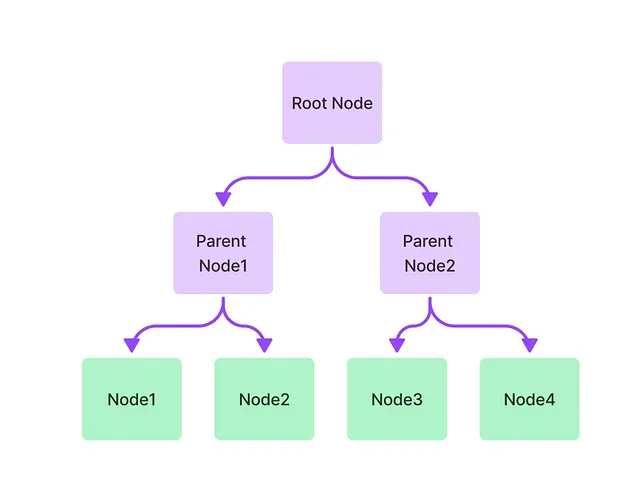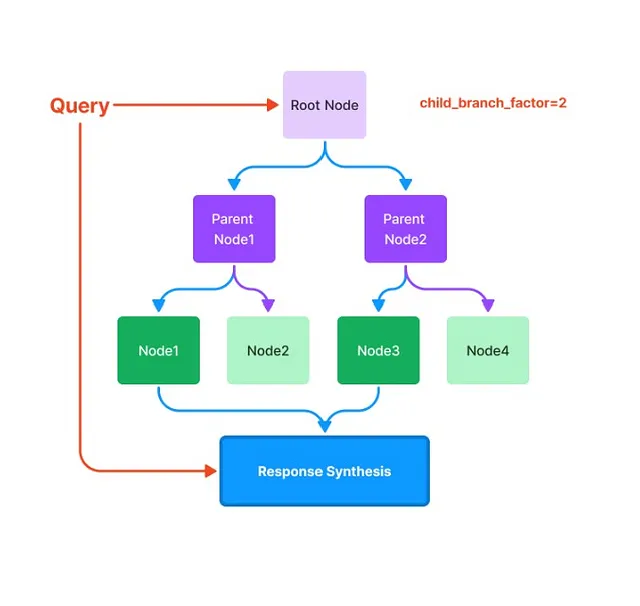

## Baseado em palavras-chave

O índice de `palavras-chave` extrai palavras-chave usando GPT do texto, as palavras-chave são armazenadas em uma tabela para fazer referência ao mesmo bloco de texto durante a consulta. Existem três opções para extrair as `palavras-chave - GPT`, `RegEx simples` e `RAKE`.


```
from gpt_index import GPTKeywordTableIndex, SimpleDirectoryReader 

# construir
 documentos de índice = SimpleDirectoryReader( 'data' ).load_data() 
index = GPTKeywordTableIndex(documents)
```

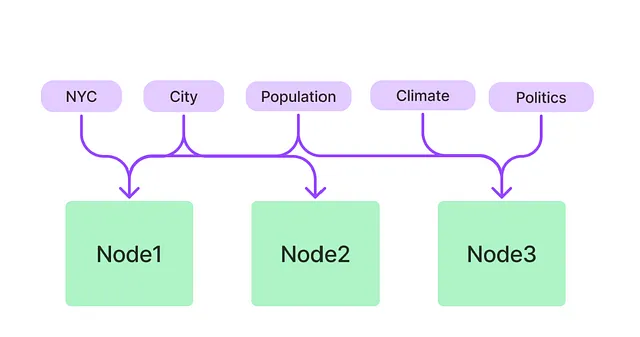

# Baseado em gráfico (Graph-Based)

O índice GPT também pode formar um índice baseado em gráfico de conhecimento automatizado a partir dos dados de texto fornecidos. As `entidades` e suas relações são extraídas por meio de um `LLM` de um prompt que se parece com:


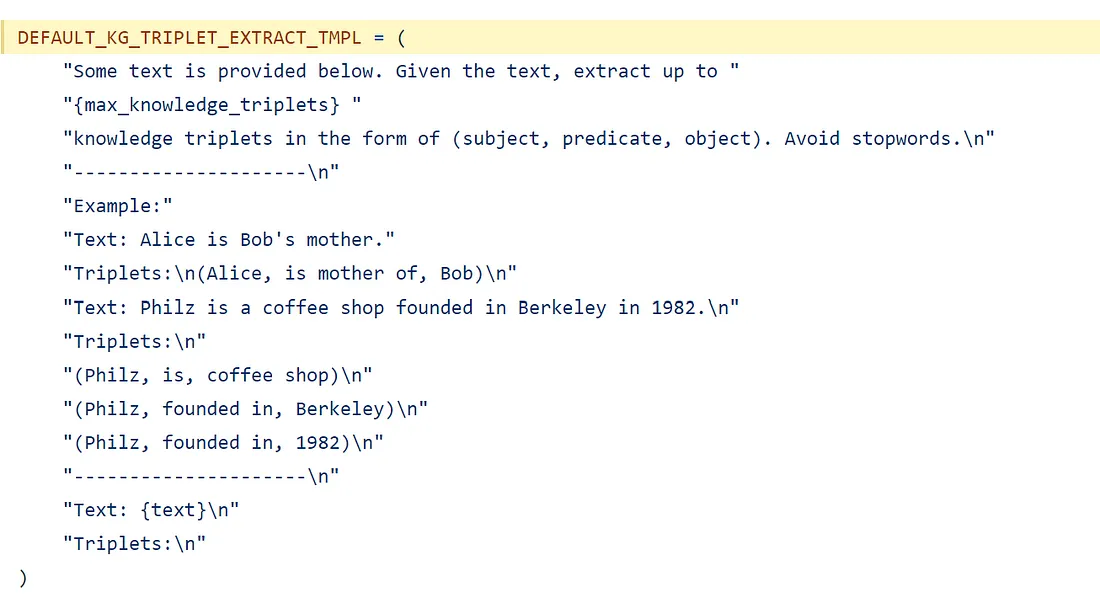

Depois de extrair as `Entidades e seus relacionamentos`, todos os dados externos em vários formatos são salvos na forma de um gráfico de conhecimento. Técnicas de travessia e recuperação de gráficos são usadas para processar e recuperar os dados como contexto relevante.

# Consultando o índice e a geração de resposta

Depois de indexar toda a nossa base de conhecimento externa. Os modelos GPT podem ser consultados por meio de uma única linha de código.


```
response = index.query("Escreva um e-mail para o usuário com suas informações básicas.")
print(response)
```


Ele também fornece algumas funcionalidades avançadas de consulta:

<font color="red">1.</font> `Modos de resposta` — Pode haver vários modos de resposta como `“Default”`, `“compacto”` e `“árvore_resumida”`

* `Default:` Passa por cada nó sequencialmente (`uma chamada LLM por nó`) e gera uma resposta. É bom para respostas muito detalhadas, onde todos os documentos são necessários como contexto.

* `Compact:` Chama preenchendo o máximo de blocos de texto do Node (`Node text chunks`) que caibam no tamanho máximo do prompt.

* `tree_summarize:` Dado um conjunto de nós e a query, construa recursivamente uma árvore e retorne o nó raiz como resposta. `É bom para fins de resumo`.


<font color="red">2.</font> `Específico de palavras-chave` — Podemos fornecer consultas específicas de palavras-chave, por exemplo, para incluir ou excluir uma palavra específica



```
index.query(
    "What did the author do after Y Combinator?", required_keywords=["Combinator"], 
    exclude_keywords=["Italy"]
)
```

<font color="red">3.</font> `Cite as fontes` junto com a geração da resposta — Também podemos obter as fontes que o LLM usou para gerar a resposta usando o atributo `source_nodes`.

```
# get response
# response.response
str(response)

# get sources
response.source_nodes
# formatted sources
response.get_formatted_sources()
```


Aqui está um exemplo geral de consulta e geração de citações/recursos:

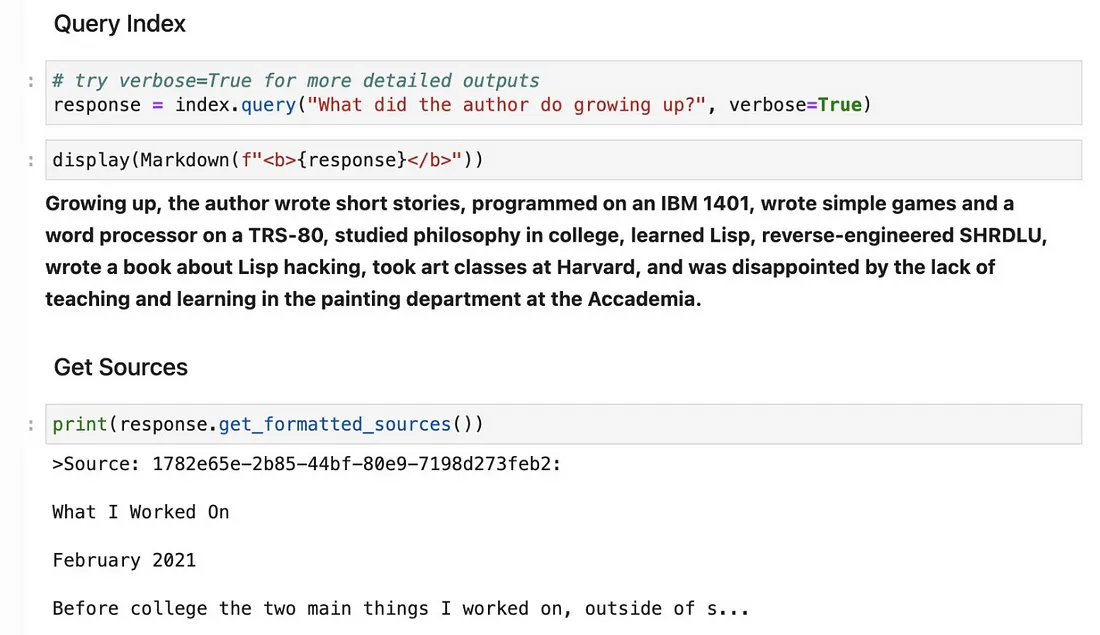